
### 1-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자







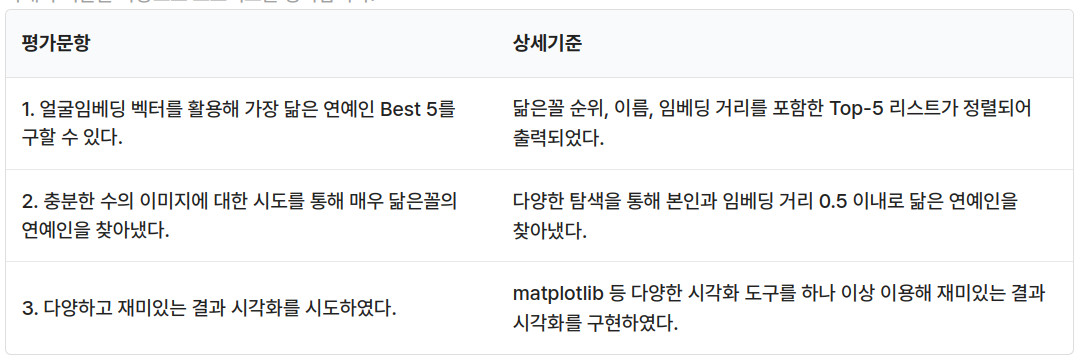

In [6]:
# 주요 라이브러리 버전 확인 
import face_recognition
import numpy
import PIL

print(face_recognition.__version__)
print(numpy.__version__)
print(PIL.__version__)

1.2.3
1.22.2
8.3.2


- https://ddolcat.tistory.com/690  PIL(Phython Image Library) pillow 모듈중 하나. 강력한 이미지 처리와 그래픽 기능 제공

파이썬 이미지 디렉토리에 저장하기

### Step1. 사진 모아 directory에 저장

 1. 내 사진 찍어 내 사진과 비교해 보고 싶은 연예인 사진을 하나의 디렉토리 안에 담는다. 모을 때 사진의 파일명은 가급적 장동건.jpg, 김태희.png와 같이 파일명이 사람 이름이 들어 있도록. 
 

- 내 사진을 2장 이상 포함.


- 내 사진들끼리의 얼굴 임베딩 벡터 거리를 구한다. 닮았음을 확인할 수 있는 좋은 베이스라인. Q 일단 얼굴만 짤라야 되는거 아님?


2. 비교할 연예인 사진 모으기 ; 많이 모을수록 나와 더 닮은 연예인을 찾을 가능성이 높아짐.


file_list: ['박진희.jpg', '나2-조절.jpg', '최지우.jpg', '송윤아.jpg', '하희라.jpg', '채시라.jpg', '안연홍.jpg', '김현주.jpg', '이승연.jpg', '이영애.jpg', '채림.jpg', '이미연.jpg', '유진.jpg', '김아중.jpg', '심은진.jpg', '박소현.jpg', '오현경.jpg', '명세빈.jpg', '강성연.jpg', '장나라.jpg', '김성령.jpg', '홍수아.jpg', '황수정.jpg', '나1-조절.jpg', '오윤아.jpg', '김희선.jpg', '우희진.jpg', '성현아.jpg', '오연수.jpg', '신애라.jpg', '장서희.jpg', '조미령.jpg']


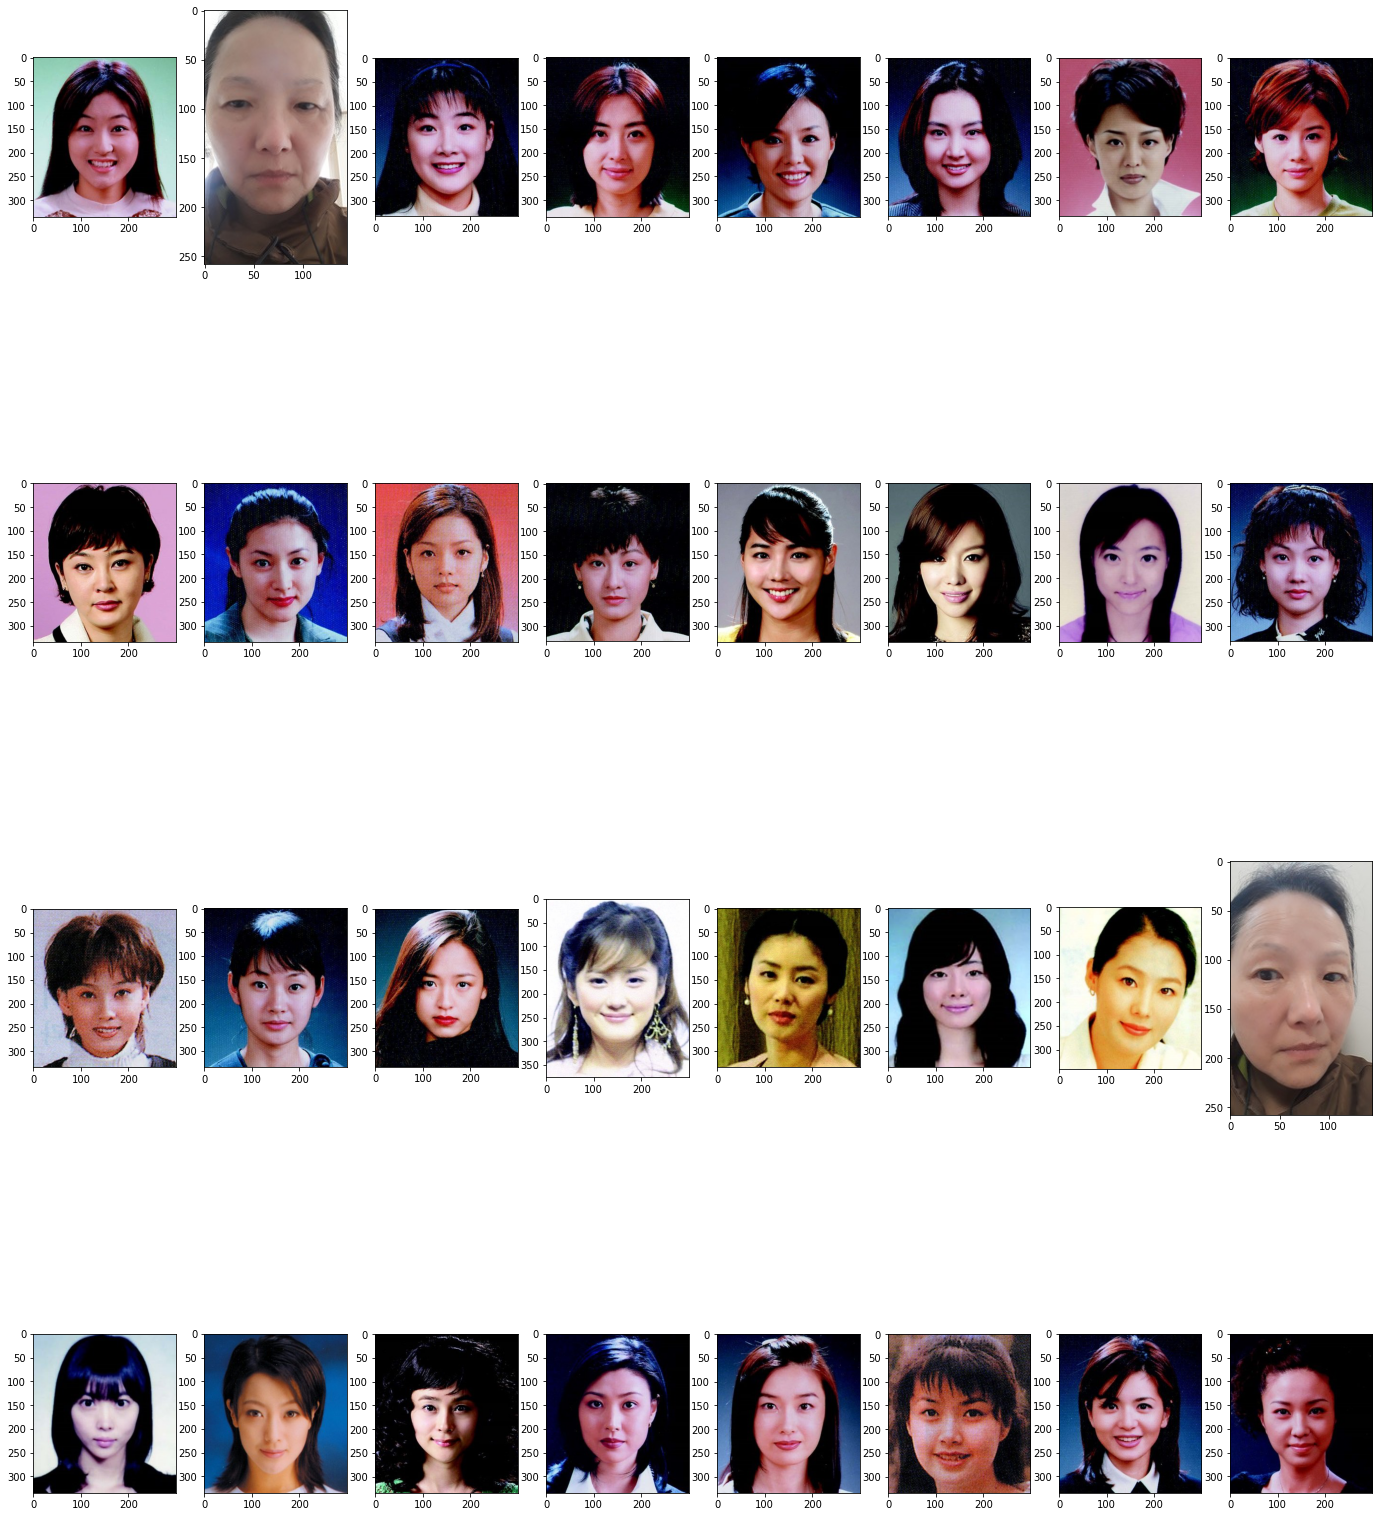

In [7]:
import os

dir_path = os.getenv('HOME')+'/aiffel/Going_Deeper/face'#directory 설정시 화일면 3단어의 언더바 놓쳐서 1차 에러, 계속 unexpected error나서 face로 변경
file_list = os.listdir(dir_path) # 2개의 내사진이 커서 resize로 줄이는데 에러 반복돼 웹상 이미지 편집기로 줄임. 

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt 
import matplotlib.image as img

fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(24,30)) #Set figsize here

for i, ax in enumerate(axes.flatten()):  # flatten axes for easy iterating
  image = img.imread(dir_path+'/'+file_list[i]) # imread 나오면 경로와 file명 나옴
  ax.imshow(image)
plt.show()

fig.tight_layout()


In [8]:
# print ('박진희.jpg'.shape)

#import cv2
#import os
 
#path = r'이미지 파일 경로'
#imgName = '이미지 파일 이름'
 
#img = cv2.imread(os.path.join(path, imgName  # Q 첫사진 사이즈 확인 하려면 ->
#print(img.shape) # h, w, c
# -----
#from PIL import Image  # Q '박진희.jpg' 어떤 경로로 가져와야함?

# img = Image.open('data/src/sample.png')

# img_resize = img.resize((int(img.width / 2), int(img.height / 2)))
# img_resize_lanczos.save('data/dst/sample_pillow_resize_half.jpg')

-  https://www.daleseo.com/python-enumerate/ enumerate() 
 for문 설명 굳, enumerate() 인자로 넘어온 목록을 기준으로 인덱스와 원소를 차례대로 접근하게 해주는 반복자(iterator) 객체를 반환해주는 함수


### Step2. 얼굴 영역 자르기


- 임베딩 추출을 위해서는 얼굴 영역을 자르기. 위 Step1.에서 찾은 이미지들을 이전에 만들었던 get_cropped_face(image_file)을 통해서 잘라줍시다! 자른 이미지는 PIL의 Image.fromarray를 통해서 PIL Image로 변환한 뒤에 저장을 해두면 다양한 재미있는 시각화를 시도해 보는 데 도움이 될 것.

 dir_path = os.getenv('HOME')+'/aiffel/Going_Deeper/face '나2-조절.jpg'
 힌트 : 얼굴 영역을 자르기. 
 from PIL import Image
 face = get_cropped_face(image_path)
 pillow_image = Image.fromarray(face)
 pillow_image.save(path_to_save)



[(116, 218, 270, 64)]


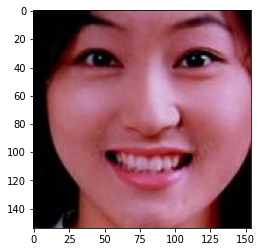

In [9]:
import face_recognition 
#import os
%matplotlib inline 
import matplotlib.pyplot as plt

image_path = os.getenv('HOME')+'/aiffel/Going_Deeper/face/박진희.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력.

a, b, c, d = face_locations[0]  # Q a, b, c, d는 뭐 ? -> 4점을 정해서 crop?
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face) 

- images 디렉토리 안에 있는 모든 이미지 파일의 임베딩을 구해서 dict 구조에 담아 리턴하는 함수를 만들자. 딕셔너리의 각 엘리먼트는 사람 이름:임베딩벡터로. 함수 이름은 get_face_embedding_dict(dir_path)

### Step3. 얼굴 영역의 임베딩 추출하기

이미지를 face_recognition 을 사용해서 이미지를 불러오고 임베딩을 추출. 다른 사람의 임베딩은 구분할 수 있게 따로 저장해 주세요. 이전에 만들었던 다음 함수들을 활용하면 손쉽게 수행 가능합니다.

def get_face_embedding(face) : 얼굴영역으로부터 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding_dict(dir_path) : 디렉토리 안에 있는 모든 이미지의 임베딩 딕셔너리를 구하는 함수

In [18]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:       
        img_path = os.path.join(dir_path, file) 
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

- get_face_embedding_dict() 함수가 잘 만들어졌는지 확인

In [19]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict

{'나2-조절': array([-0.08811154,  0.10774899,  0.11002217, -0.03175487, -0.1269884 ,
        -0.04986459, -0.00441971, -0.07977104,  0.17303196, -0.14995685,
         0.19084673, -0.07702032, -0.25900194, -0.0102434 , -0.00122479,
         0.24875274, -0.21397042, -0.1557152 , -0.07364648, -0.01650238,
         0.00804652,  0.06878029, -0.05105496, -0.03084681, -0.10710319,
        -0.38862377, -0.0566615 , -0.07617947,  0.03192827, -0.07246419,
        -0.05540553,  0.10019477, -0.14465129, -0.07282275,  0.06012315,
         0.09668139, -0.03911953, -0.07859632,  0.14985691, -0.01528151,
        -0.31825888,  0.07025976,  0.05873749,  0.27554041,  0.1860773 ,
         0.00760595,  0.02258258, -0.12543736,  0.12568842, -0.19600514,
        -0.08233392,  0.1037818 ,  0.08287133,  0.0367531 ,  0.04791377,
        -0.13284077,  0.03578525,  0.05074094, -0.21022737, -0.03045404,
         0.17792279, -0.12336741,  0.02241431, -0.07712051,  0.20642313,
        -0.03496854, -0.12410503, -0.14960

#### 내 사진 간의 임베딩 벡터 거리 

In [22]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

print('내 사진 간의 거리 : {}'.format(get_distance('나1-조절', '나2-조절')))# NameError: name 'np' is not defined 나오면 np는 라이브러리니 import해온다

내 사진 간의 거리 : 0.3468904016277385


### Step 4. 모은 연예인들과 비교하기

- 모은 연예인 사진들과 자신의 얼굴 사진에서 추출한 임베딩 벡터들 간의 거리를 비교해 보고 가장 작은 연예인이 누구 ?


- get_nearest_face(name, top=5) 함수 응용.

In [30]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [33]:
def get_nearest_face(name, top=6):
  
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

### 나 와 가장 닮은 사람은 누구?


In [34]:
get_nearest_face('나1-조절')

순위 1 : 이름(나2-조절), 거리(0.3468904016277385)
순위 2 : 이름(김성령), 거리(0.4914717636109141)
순위 3 : 이름(최지우), 거리(0.4920712349754029)
순위 4 : 이름(황수정), 거리(0.5050166336357569)
순위 5 : 이름(명세빈), 거리(0.5346078114273852)
순위 6 : 이름(조미령), 거리(0.5401855409953539)


### Step 5. 다양한 재미있는 시각화 시도해 보기


- tkinter나 flask를 활용해서 닮은꼴을 찾을 이미지를 업로드한 후 그 이미지와 닮은 얼굴을 찾는 형태로 구현.
여러분들의 재치가 넘치는 작품들을 기대합니다. 

In [35]:
from tkinter import *      
import tkinter.font
import PIL
from PIL import ImageTk as itk
from PIL import Image


def get_image(name):
    image_file = os.path.join(dir_path, name+'.jpg')
    face = get_cropped_face(image_file)
    embeddidng = face_recognition.face_encodings(face)
    #embedding_dict = get_face_embedding_dict(dir_path)
    
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    img = Image.open(dir_path+'/'+sorted_faces[1][0]+'.jpg')
    img = img.resize((img.size[0]//3, img.size[1]//3), Image.ANTIALIAS)
    result_image = itk.PhotoImage(img)
    result = Label(lower_frame, image = result_image)
    #result_label.place(relwidth=1, relheight=1)
    result.image = result_image
    result.place(relwidth=1, relheight=1)
    
    return result

In [36]:
Height =800
Width = 1000

window = Tk()      
#window = Toplevel()
window.title("Find your Lookalike")
canvas = Canvas(window, height= Height, width= Width)
canvas.pack()
font=tkinter.font.Font(family="BM DoHyeon", size=20, slant="italic")

background_image = PhotoImage(file = 'bg.png')
background_label = Label(window, image = background_image)
background_label.place(relwidth=1,relheight=1)

label = Label(window, bg='mistyrose', font=font, text = "Which celebrity resembles me the most? Please write your name")
label.place(relx=0.02, rely=0.01, relwidth=0.95, relheight=0.1)

frame = Frame(window, bg='mistyrose', bd=5)
frame.place(relx=0.5, rely=0.1, relwidth=0.7, relheight=0.1, anchor='n')


button = Button(frame, text = "확인", bg='lightcoral', fg = 'rebeccapurple', command=lambda:get_image(entry.get()))  

button.place(relx=0.7, relheight=1, relwidth=0.3)

entry = Entry(frame, font=40)
entry.place(relwidth=0.65, relheight=1)

lower_frame = Frame(window, bg='mistyrose', bd=10)
lower_frame.place(relx=0.5, rely=0.25, relwidth=0.9, relheight=0.7, anchor = 'n')


window.mainloop()  

TclError: no display name and no $DISPLAY environment variable

- ref.  https://github.com/hyunnie94/AIFFEL/blob/master/E07_FaceEmbedding/%5BE07%5D%20Face%20Embedding.ipynb


  
- 모르는 코드가 많아 Error를 해결할수가 없었음. 

### Reference

- https://leebaro.tistory.com/entry/numpylinalgnorm distances = np.linalg.norm([A, B] - C, axis=1, ord=1) 코드 의미



- https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html linalg.norm, ord1, 2, 



- https://kongdols-room.tistory.com/98 tight_layout()



- https://ddolcat.tistory.com/690 PIL



- https://www.daleseo.com/python-enumerate/ enumerate() 


- https://prup.tistory.com/69 사진 사이즈 확인 shape 함수

### 회고 

- 휴대폰으로 찍은 내사진과 연예인 사진 크기가 달라 크기 조절하는데 많은 시행착오를 겪고 보고 이미지를 다루는게 시간이 많이 걸리는 작업인걸 경험했다.


- Directory 담은 이미지를 반복 조절해서 그런지 unexpeted error가 빈번해서 여기에 시간이 많이 소모됨.  

#### [ 해결할  의문들 ]

- 주석 처리했는데 왜 이런 에러? # %matplotlib inline # Q inline은 뭐 ? ->  UsageError: unrecognized arguments: 


#### [ 그동안 공부한거 뒤지고 검색하고도 해결 못한거 ]

- 위 사진 사이즈 shape으로 파악하는것 + resize로 줄이는것 